<a href="https://colab.research.google.com/github/Uriel-Ortega98/sustainable_logistics/blob/main/Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Assignment problem: workers - tasks
We are given five workers (numbered 0-4) and four tasks (numbered 0-3) together with the costs of assigning workers to tasks, as shown in the next table. The goal is to assign each worker to at most one task, with no two workers performing the same task, while minimizing the total cost. Since there are more workers than tasks, one worker will not be assigned a task.

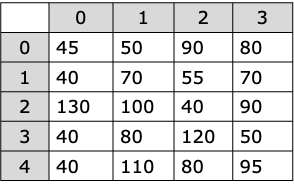

In [ ]:
!pip install ortools
from ortools.linear_solver import pywraplp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 38.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

In the following code block we declare the function main() that, in order, is composed by the following steps:


*   Declaration and initialization of the cost funtion, number of workers and tasks;
*   Solver declaration;
*   Variable declaration;
*   Constraints logic;
*   Objective function;
*   Storing solver output in the status variable;
*   Print solution.



In [ ]:
def main():

    # Data
    costs = [
        [45, 50, 90, 80],
        [40, 70, 55, 70],
        [130, 100, 40, 90],
        [45, 80, 120, 50],
        [40, 110, 80, 95],
    ]
    num_workers = len(costs)
    num_tasks = len(costs[0])

    # Solver
    # Create the mip solver with the SCIP backend.


    solver = pywraplp.Solver.CreateSolver('CLP')


    # Variables
    # x[i, j] is an array of 0-1 variables, which will be 1
    # if worker i is assigned to task j.

    x = {}
    for i in range(num_workers):
        for j in range(num_tasks):
            x[i, j] = solver.IntVar(0, 1, '')

    # Constraints

    # Each worker is assigned to at most 1 task.
    for i in range(num_workers):
        solver.Add(solver.Sum([x[i, j] for j in range(num_tasks)]) <= 1)

    # Each task is assigned to exactly one worker.
    for j in range(num_tasks):
        solver.Add(solver.Sum([x[i, j] for i in range(num_workers)]) == 1)

    # Objective

    solver.Minimize(solver.Sum([costs[i][j] * x[i,j] for i in range(num_workers)
                                                  for j in range(num_tasks)]))

    # Solve

    status = solver.Solve()

    # Print solution.
    if status == pywraplp.Solver.OPTIMAL:
        print('Total cost = ', solver.Objective().Value(), '\n')
        for i in range(num_workers):
            for j in range(num_tasks):
                # Test if x[i,j] is 1 (with tolerance for floating point arithmetic).
                if x[i, j].solution_value() > 0.5:
                    print('Worker %d assigned to task %d.  Cost = %d' %
                          (i, j, costs[i][j]))


Lastly, we call the function.

In [ ]:
main()

Total cost =  180.0 

Worker 0 assigned to task 1.  Cost = 50
Worker 1 assigned to task 0.  Cost = 40
Worker 2 assigned to task 2.  Cost = 40
Worker 3 assigned to task 3.  Cost = 50


# 2. Extension of problem 1
There are many versions of the assignment problem, which have additional constraints on the workers or tasks. In this example you are given six workers divided into two teams, and each team can perform at most two tasks.
The workers are divided as follows:

*   Team one: 0, 1, 4
*   Team two: 2, 3, 5


The additional constraints need to be met:
*   Each worker is assigned to at most 1 task
*   Each task is assigned to exactly one worker
*   Worker 0 has to be assigned to either task 2 or 3

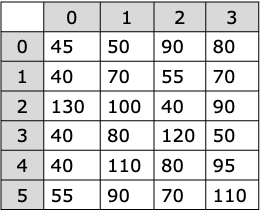

##2a. Structure for resolution

In [ ]:
from __future__ import print_function
from ortools.linear_solver import pywraplp

def main():

  # initialize your solver, you can use the 'CLP' solver


  # initialize the cost matrix
  cost = [[45, 50, 90, 80],
        [40, 70, 55, 70],
        [130, 100, 40, 90],
        [45, 80, 120, 50],
        [40, 110, 80, 95],
        [55, 90, 70, 110]]

  # declare the two teams and team_max


  # declare num_workers and num_tasks and assign them the correct value

  x = {}
  for i in range(num_workers):
    for j in range(num_tasks):
      x[i, j] = solver.IntVar(0, 1, '')

  # Objective function

  # Constraints

  # Each worker is assigned to at most 1 task.

  # Each task is assigned to exactly one worker.

  # Worker 0 has to be assigned to either task 2 or 3

  # Each team takes on two tasks.

  # Solve the model


  print('Total cost = ', solver.Objective().Value())
  print()
  for i in range(num_workers):
    for j in range(num_tasks):
      if x[i, j].solution_value() > 0:
        print('Worker %d assigned to task %d.  Cost = %d' % (
              i,
              j,
              cost[i][j]))

  print()
  print("Time = ", solver.WallTime(), " milliseconds")
if __name__ == '__main__':
  main()

##2b. Complete solution

As usual, we define a function with the logic of the required solution.


In [ ]:
#!pip install ortools
from __future__ import print_function
from ortools.linear_solver import pywraplp

In [ ]:
def main():
  solver = pywraplp.Solver.CreateSolver('CLP')

  cost = [[45, 50, 90, 80],
        [40, 70, 55, 70],
        [130, 100, 40, 90],
        [45, 80, 120, 50],
        [40, 110, 80, 95],
        [55, 90, 70, 110]]

  team1 = [0, 1, 4]
  team2 = [2, 3, 5]
  team_max = 2

  num_workers = len(cost)
  num_tasks = len(cost[1])

  x = {}
  for i in range(num_workers):
    for j in range(num_tasks):
      x[i, j] = solver.IntVar(0, 1, '')

  # Objective
  solver.Minimize(solver.Sum([cost[i][j] * x[i,j] for i in range(num_workers)
                                                  for j in range(num_tasks)]))

  # Constraints


  # Each worker is assigned to at most 1 task.
  for i in range(num_workers):
    solver.Add(solver.Sum([x[i, j] for j in range(num_tasks)]) <= 1)

  # Each task is assigned to exactly one worker.
  for j in range(num_tasks):
    solver.Add(solver.Sum([x[i, j] for i in range(num_workers)]) == 1)

  # Worker 0 has to be assigned to either task 2 or 3
  solver.Add(solver.Sum(x[0, j] for j in [2, 3]) == 1)


  solver.Add(solver.Sum([x[i,j] for i in team1 for j in range(num_tasks)]) <= 2)
  solver.Add(solver.Sum([x[i,j] for i in team2 for j in range(num_tasks)]) <= 2)


  #solve the model
  sol = solver.Solve()

  print('Total cost = ', solver.Objective().Value())
  print()
  for i in range(num_workers):
    for j in range(num_tasks):
      if x[i, j].solution_value() > 0:
        print('Worker %d assigned to task %d.  Cost = %d' % (
              i,
              j,
              cost[i][j]))

  print()
  print("Time = ", solver.WallTime(), " milliseconds")

In [ ]:
main()

Total cost =  235.0

Worker 0 assigned to task 3.  Cost = 80
Worker 1 assigned to task 1.  Cost = 70
Worker 2 assigned to task 2.  Cost = 40
Worker 3 assigned to task 0.  Cost = 45

Time =  6  milliseconds
